# PDS: Assignment 2

### Deadline: April 30 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment_1.ipynb (ex. Elon_Musk_1906_Assignment_2.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 2 points.

## Q1 (40%)
Use Credit.csv datasets and use only parameters Income and Ethnicity to predict Balance. Do the following:
1. You are allowed to use sklearn, but not statsmodels.
2. Build a model that takes Ethnicity with dummy variables. 
3. Show that building three separate models for each possible Ethnicity value will result in the same models as in case of using Ethnicity with dummy variables in one model. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Credit.csv')

#Taking dataset with only 3 columns 
df1 = df[['Income', 'Ethnicity', 'Balance']]
#getting dummies for Ethnicity
dum = pd.get_dummies(df1['Ethnicity'])
df1 = pd.concat([df1, dum], axis=1)
df1 = df1.drop('Ethnicity', 1)

In [3]:
#splitting train and test sets
y = df1.Balance
X = df1.drop('Balance', 1)

#scaling
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#fitting the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

#predicting
pred = clf.predict(X_test)
print ('Accuracy for Dataset with dummies in one model: {0}'.format(clf.score(X_test, y_test)))

Accuracy for Dataset with dummies in one model: 0.23484848484848486


In [4]:
#THE SAME OPERATIONS WITH THREE POSSIBLE ETHNICITY VALUES
df1_1 = df1.iloc[:, [0,1,2]]
y = df1_1.Balance
X = df1_1.drop('Balance', 1)

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print ('Accuracy for Dataset with only African American Ethnicity: {0}'.format(clf.score(X_test, y_test)))

Accuracy for Dataset with only African American Ethnicity: 0.23484848484848486


In [5]:
#THE SAME OPERATIONS WITH THREE POSSIBLE ETHNICITY VALUES
df1_1 = df1.iloc[:, [0,1,3]]
y = df1_1.Balance
X = df1_1.drop('Balance', 1)

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print ('Accuracy for Dataset with only Asian Ethnicity: {0}'.format(clf.score(X_test, y_test)))

Accuracy for Dataset with only Asian Ethnicity: 0.23484848484848486


In [6]:
#THE SAME OPERATIONS WITH THREE POSSIBLE ETHNICITY VALUES
df1_1 = df1.iloc[:, [0,1,4]]
y = df1_1.Balance
X = df1_1.drop('Balance', 1)

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print ('Accuracy for Dataset with only Caucasian Ethnicity: {0}'.format(clf.score(X_test, y_test)))

Accuracy for Dataset with only Caucasian Ethnicity: 0.23484848484848486


So, we can see that the result of accuracy score for all of them was the same.

## Q2 (60%)
Build your best model to predict Balance. Do the following steps:
1. Use 10% of data for testing set with random seed = 2021, i.e. you will get 40 observations for testing. 
2. You can use any available parameters, also you can do feature engineering. 
3. Evaluate performance of your model/models on test set and use MSE and R-squared as evaluation metrics.
4. Describe every step you do and show obtained results at the end.

*Note: if you apply (correctly) more techniques, you will get higher mark.*

In [7]:
df = pd.read_csv('Credit.csv', skipinitialspace=True,)
df_copy = df.copy()

#changing column values to 1 and 0 instead of 'Yes', 'No', 'Male', 'Female'
for c in ['Student', 'Married']:
    df.loc[:, c] = df[c].map({'Yes' : 1, 'No' : 0})
    
df.loc[:, 'Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})

#taking dummies for Ethnicity column
dum = pd.get_dummies(df['Ethnicity'])
df = pd.concat([df, dum], axis=1)
df = df.drop('Ethnicity', 1)

<AxesSubplot:>

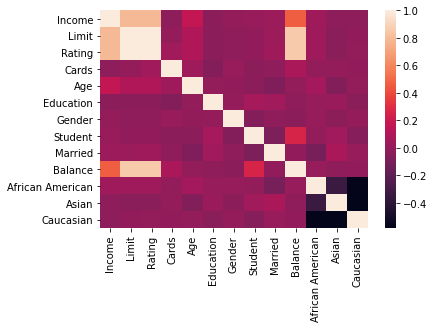

In [8]:
#looking for correlation
sns.heatmap(df.corr())

In [9]:
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Dropping highly correlated features 
df.drop(to_drop, axis=1, inplace=True)
df

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
0,14.891,3606,2,34,11,1,0,1,333,0,0,1
1,106.025,6645,3,82,15,0,1,1,903,0,1,0
2,104.593,7075,4,71,11,1,0,0,580,0,1,0
3,148.924,9504,3,36,11,0,0,0,964,0,1,0
4,55.882,4897,2,68,16,1,0,1,331,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,3,32,13,1,0,1,560,0,0,1
396,13.364,3838,5,65,17,1,0,0,480,1,0,0
397,57.872,4171,5,67,12,0,0,1,138,0,0,1
398,37.728,2525,1,44,13,1,0,1,0,0,0,1


In [11]:
cols = df.columns
cols = cols.drop('Balance')
#print(cols)
#splitting for train, test sets with 10% of data for testing set
y = df.Balance
X = df.drop('Balance', 1)

#scaling for better performance
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 2021)

#fitting the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print(reg.intercept_)
print(reg.coef_)

zip(cols, reg.coef_)

#predicting
y_pred = reg.predict(X_test)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('R2 score: ', metrics.r2_score(y_test, y_pred))

520.9726839016329
[-2.72520938e+02  6.11648933e+02  3.11754723e+01 -1.01382117e+01
 -4.36185395e+00  7.16615491e+00  1.29390683e+02 -2.98183758e+00
 -3.60087094e+00  2.98473408e+00  5.06128030e-01]
MSE:  7431.397982224522
R2 score:  0.9620582658250865
